<a href="https://colab.research.google.com/github/skolix15/Machine_Learning_2025/blob/main/Exercise_five_(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Question 1

In [ ]:
# Import data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# Question 2

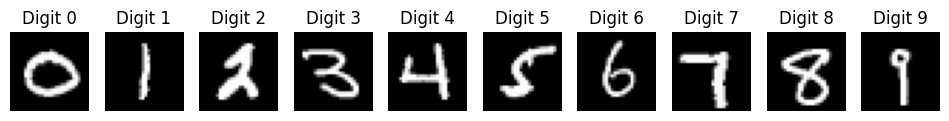

In [ ]:
plt.figure(figsize=(12, 3))

for digit in range(10):

    # Get all the data of this digit (that appear this digit (y train has the value of the image))
    indices = np.where(y_train == digit)[0]

    # Select randomly a part of the list (a sample)
    idx = np.random.choice(indices)
    img = x_train[idx]

    # Create plot
    plt.subplot(1, 10, digit + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Digit {digit}")
    plt.axis('off')

plt.show()

# Question 3

1. Από το ".shape" στο ερώτημα (1) προκύπτει ότι η εικόνα έχει διαστάσεις 28×28, δηλαδή συνολικά 784 pixels.

2. Από αυτά, δεν είναι όλα χρήσιμα. Αυτά που μας ενδιαφέρουν είναι τα pixels που αποτελούν το ίδιο το ψηφίο (τα φωτεινά, στις γραμμές και καμπύλες του) και όχι εκείνα που σχηματίζουν το σκοτεινό φόντο.

# Question 4

In [ ]:
# Note: x_train & x_test have shape (N, 28, 28)
# Convert data to vectors
x_train_vec = x_train.reshape(x_train.shape[0], 28*28)
x_test_vec  = x_test.reshape(x_test.shape[0], 28 * 28)

# Print results
print(x_train_vec.shape)
print(x_test_vec.shape)

(60000, 784)
(10000, 784)


# Question 5

Training KNN with k=1...
Train accuracy = 1.0000 | Test accuracy = 0.9691

Training KNN with k=15...
Train accuracy = 0.9710 | Test accuracy = 0.9633

Training KNN with k=51...
Train accuracy = 0.9532 | Test accuracy = 0.9533

Training KNN with k=244...
Train accuracy = 0.9211 | Test accuracy = 0.9241



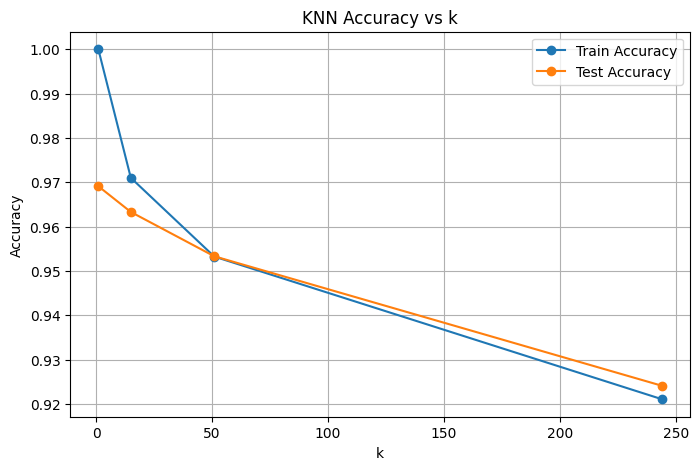

In [ ]:
# Calculate N
N = x_train_vec.shape[0]
# Set k values
k_values = [1, 15, 51, int(np.sqrt(N))]

def execute_question_5(x_train_vec_tmp, x_test_vec_tmp, y_train_tmp, y_test_tmp):

  train_accuracies = []
  test_accuracies = []

  for k_value in k_values:

    print(f"Training KNN with k={k_value}...")

    # Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=k_value)
    knn.fit(x_train_vec_tmp, y_train_tmp)

    # Make predictions
    y_train_pred = knn.predict(x_train_vec_tmp)
    y_test_pred = knn.predict(x_test_vec_tmp)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train_tmp, y_train_pred)
    test_accuracy = accuracy_score(y_test_tmp, y_test_pred)

    # Add accuracies in the respective lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print(f"Train accuracy = {train_accuracy:.4f} | Test accuracy = {test_accuracy:.4f}\n")

  # Create plots
  plt.figure(figsize=(8, 5))
  plt.plot(k_values, train_accuracies, marker='o', label='Train Accuracy')
  plt.plot(k_values, test_accuracies, marker='o', label='Test Accuracy')

  plt.xlabel("k")
  plt.ylabel("Accuracy")
  plt.title("KNN Accuracy vs k")
  plt.grid(True)
  plt.legend()
  plt.show()

# Execute question 5
execute_question_5(
    x_train_vec_tmp=x_train_vec,
    x_test_vec_tmp=x_test_vec,
    y_train_tmp=y_train,
    y_test_tmp=y_test
)






# Question 6

Training KNN with k=1...
Train accuracy = 1.0000 | Test accuracy = 0.9691

Training KNN with k=15...
Train accuracy = 0.9710 | Test accuracy = 0.9633

Training KNN with k=51...
Train accuracy = 0.9532 | Test accuracy = 0.9533

Training KNN with k=244...
Train accuracy = 0.9211 | Test accuracy = 0.9241



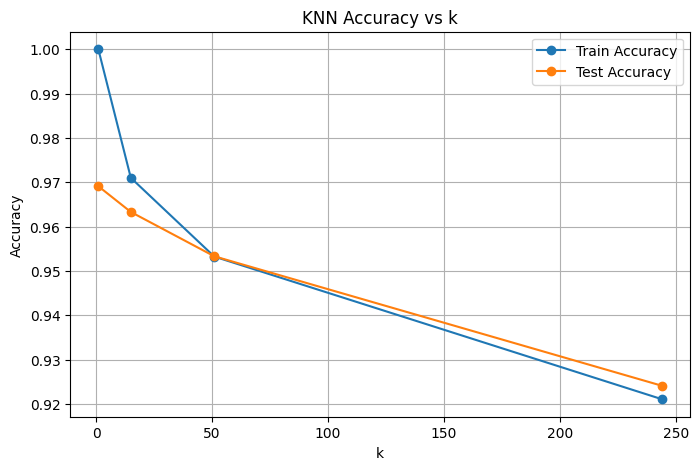

In [ ]:
# Normalize sets (x_train, x_test) in order to escalate between [0, 1]
x_train_vec_norm = x_train_vec.astype("float32") / 255.0
x_test_vec_norm  = x_test_vec.astype("float32") / 255.0

# Execute question 5
execute_question_5(
    x_train_vec_tmp=x_train_vec_norm,
    x_test_vec_tmp=x_test_vec_norm,
    y_train_tmp=y_train,
    y_test_tmp=y_test
)

Μετά την κανονικοποίηση των pixel τιμών στο διάστημα [0, 1] και την επανάληψη του πειράματος, οι ακρίβειες των ταξινομητών KNN παρέμειναν ακριβώς οι ίδιες. Αυτό συμβαίνει επειδή η κανονικοποίηση κλιμακώνει όλες τις αποστάσεις κατά τον ίδιο παράγοντα (1/255), χωρίς να αλλάζει τη σειρά των κοντινότερων γειτόνων. Άρα ο KNN πραγματοποιεί τις ίδιες προβλέψεις.